<a href="https://colab.research.google.com/github/CM-007/pythonCode_DS/blob/main/SimpleLinearRegression(NewspaperData_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# *Load Data Set*

In [2]:
data =pd.read_csv('/content/NewspaperData.csv')
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


# *Correlation*

In [4]:
data.corr() #check daily vs. sunday

<ipython-input-4-5219f1af5f9d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr() #check daily vs. sunday


,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<ipython-input-5-c96293807f0b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.daily) # density plot for daily


<Axes: xlabel='daily', ylabel='Density'>

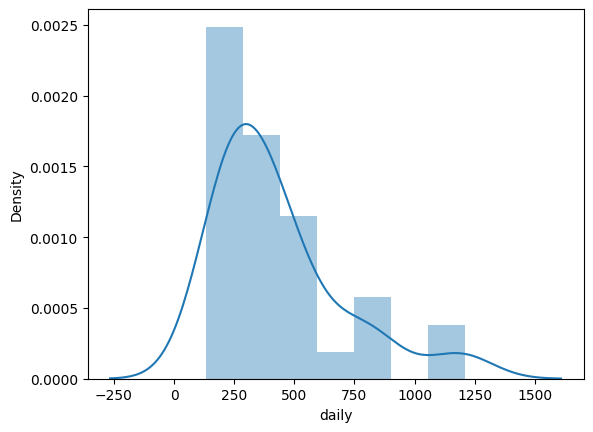

In [5]:
import seaborn as sns
sns.distplot(data.daily) # density plot for daily

<ipython-input-6-3b1c07b4f6e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.sunday) # density plot for daily


<Axes: xlabel='sunday', ylabel='Density'>

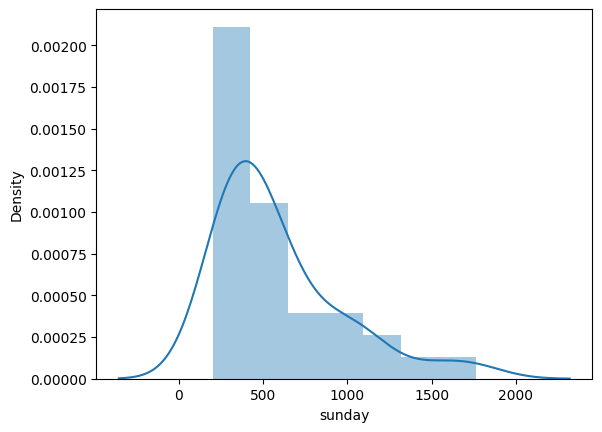

In [6]:
sns.distplot(data.sunday) # density plot for daily

# **Fitting Linear Regression Model**

In [7]:
import statsmodels.formula.api as smf

model = smf.ols("sunday~daily",data=data).fit()
# ols(Ordinary List Square) - find the distance

In [8]:
# Coefficients are B0 and B1
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [9]:
sunday = 13.83 + 1.33 * 200
sunday

279.83

In [10]:
# R squared value
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

<Axes: xlabel='daily', ylabel='sunday'>

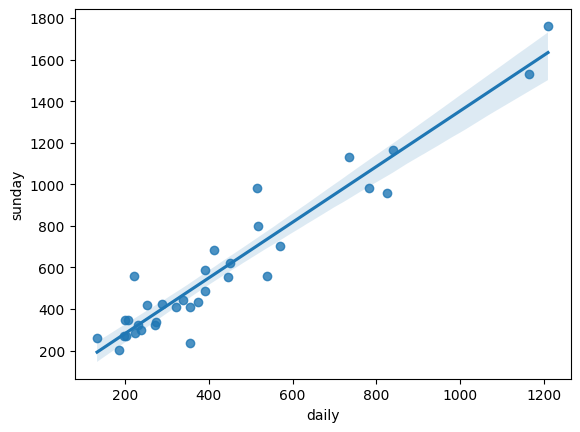

In [11]:
sns.regplot(x='daily',y='sunday',data=data) # how to print regression line

In [12]:
print("T Values :\n",model.tvalues,'\n','P Values :\n',model.pvalues)

T Values :
 Intercept     0.386427
daily        18.934840
dtype: float64 
 P Values :
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64
